In [2]:
from google.colab import files
uploaded = files.upload()

Saving conversational_interviews_clean_final.csv to conversational_interviews_clean_final (1).csv


In [3]:
import pandas as pd

# Load the uploaded dataset
file_path = "conversational_interviews_clean_final.csv"
data = pd.read_csv(file_path)

# Show basic info and preview
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transcript_id         500 non-null    object 
 1   employee_id           500 non-null    object 
 2   name                  500 non-null    object 
 3   designation           500 non-null    object 
 4   education             500 non-null    object 
 5   experience            500 non-null    object 
 6   interview_date        500 non-null    object 
 7   interview_transcript  500 non-null    object 
 8   skills_mentioned      500 non-null    object 
 9   overall_score         500 non-null    float64
 10  feedback              500 non-null    object 
 11  hiring_decision       500 non-null    object 
 12  interview_summary     500 non-null    object 
dtypes: float64(1), object(12)
memory usage: 50.9+ KB


(None,
   transcript_id employee_id             name          designation  \
 0       TID0001     EID0001  Brandon Russell         Data Analyst   
 1       TID0002     EID0002      Shelly Gray         ML Associate   
 2       TID0003     EID0003     Samuel Moore  Data Science Intern   
 3       TID0004     EID0004       Mia Martin         ML Associate   
 4       TID0005     EID0005   Brandon Harper         Data Analyst   
 
               education experience interview_date  \
 0  M.Sc in Data Science    0 years     2025-02-05   
 1    MBA with Analytics    4 years     2025-05-05   
 2  M.Sc in Data Science    5 years     2025-03-22   
 3            B.Sc in CS    5 years     2025-07-10   
 4  M.Sc in Data Science    5 years     2025-01-29   
 
                                 interview_transcript  \
 0  Interviewer: Tell me about yourself.\nCandidat...   
 1  Interviewer: Tell me about yourself.\nCandidat...   
 2  Interviewer: Tell me about yourself.\nCandidat...   
 3  Interviewer: 

In [4]:
# Drop duplicates if any
data.drop_duplicates(inplace=True)

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Drop rows with missing values (optional)
# data.dropna(inplace=True)


Missing values:
 transcript_id           0
employee_id             0
name                    0
designation             0
education               0
experience              0
interview_date          0
interview_transcript    0
skills_mentioned        0
overall_score           0
feedback                0
hiring_decision         0
interview_summary       0
dtype: int64


In [5]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Encode the target column
data['hiring_label'] = label_encoder.fit_transform(data['hiring_decision'])

# See the mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Preview encoded data
data[['hiring_decision', 'hiring_label']].head()


Label Mapping: {'Hire': np.int64(0), 'Reject': np.int64(1)}


,hiring_decision,hiring_label
0,Reject,1
1,Hire,0
2,Reject,1
3,Hire,0
4,Reject,1


In [6]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK data (first time only)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('all')


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean text
def preprocess_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    tokens = nltk.word_tokenize(text)  # tokenize
    tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # lemmatize
    return ' '.join(tokens)

# Apply to transcript column
data['clean_transcript'] = data['interview_transcript'].apply(preprocess_text)

# Preview cleaned data
data[['interview_transcript', 'clean_transcript']].head(2)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptro

,interview_transcript,clean_transcript
0,Interviewer: Tell me about yourself.\nCandidat...,interviewer tell candidate umm hello im brando...
1,Interviewer: Tell me about yourself.\nCandidat...,interviewer tell candidate uhh hi im shelly gr...


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the clean transcript
X = vectorizer.fit_transform(data['clean_transcript'])

# Optional: convert to DataFrame for inspection
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

X_df.head()


,adam,adkins,aguirre,albert,alexander,aligns,allen,alvarez,amanda,amy,...,worked,wright,wu,wyatt,yang,yet,young,zachary,zamora,zuniga
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.089977,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.115032,0.0,0.0,0.0,0.0,...,0.108414,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.122176,0.0,0.0,0.0,0.0,...,0.115147,0.0,0.0,0.0,0.0,0.190975,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.087703,0.0,0.0,0.0,0.0


In [8]:
X = data['clean_transcript']
y = data['hiring_decision']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Optional: To see label mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_vectorized = vectorizer.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y_encoded, test_size=0.2, random_state=42
)


Label Mapping: {'Hire': np.int64(0), 'Reject': np.int64(1)}


In [9]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = LinearSVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[49  4]
 [ 8 39]]

Classification Report:
               precision    recall  f1-score   support

        Hire       0.86      0.92      0.89        53
      Reject       0.91      0.83      0.87        47

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100


Accuracy: 0.88


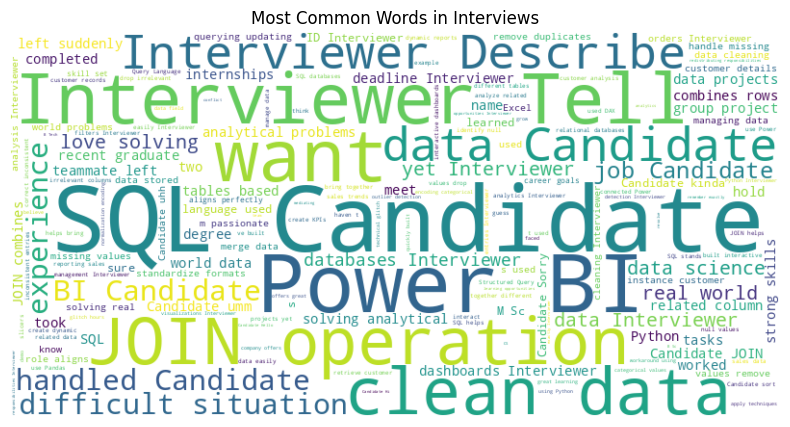

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(data['interview_transcript'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Interviews")
plt.show()


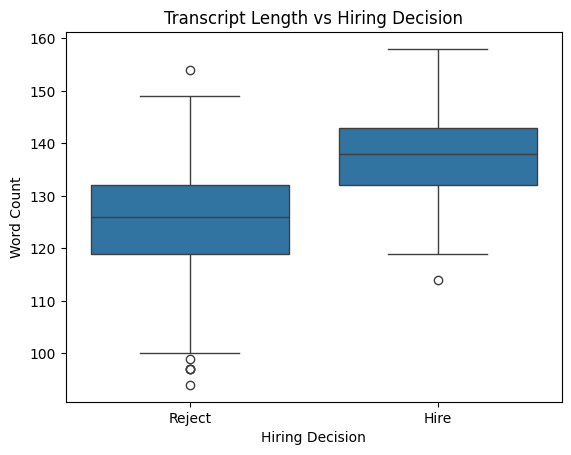

In [27]:
import seaborn as sns

data['transcript_length'] = data['interview_transcript'].apply(lambda x: len(str(x).split()))
sns.boxplot(x='hiring_decision', y='transcript_length', data=data)
plt.title("Transcript Length vs Hiring Decision")
plt.xlabel("Hiring Decision")
plt.ylabel("Word Count")
plt.show()

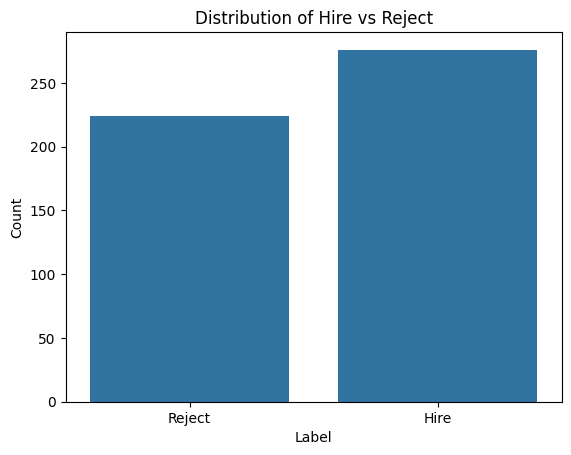

In [29]:
sns.countplot(x='hiring_decision', data=data)
plt.title("Distribution of Hire vs Reject")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

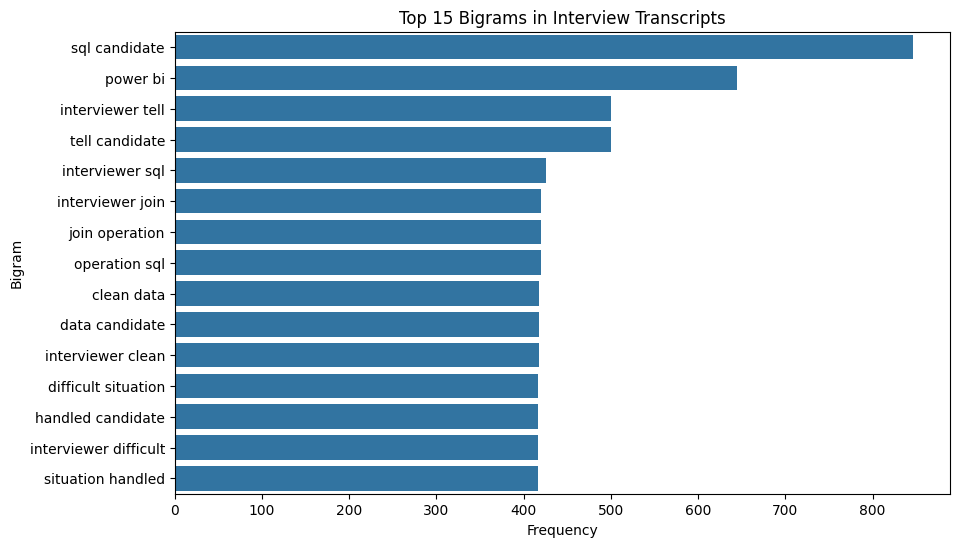

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

vec = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vec.fit_transform(data['interview_transcript'].dropna())
bigrams = vec.get_feature_names_out()
counts = X.sum(axis=0).A1
bigram_freq = dict(zip(bigrams, counts))

top_bigrams = dict(Counter(bigram_freq).most_common(15))

plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_bigrams.values()), y=list(top_bigrams.keys()))
plt.title("Top 15 Bigrams in Interview Transcripts")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()


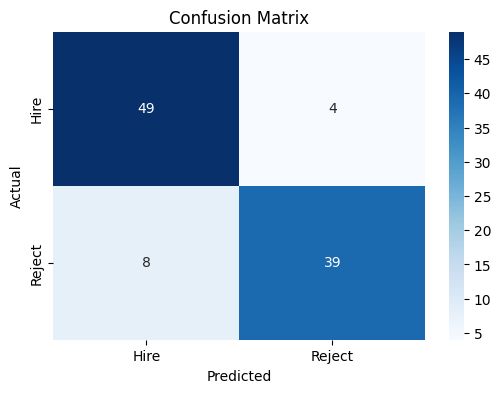

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


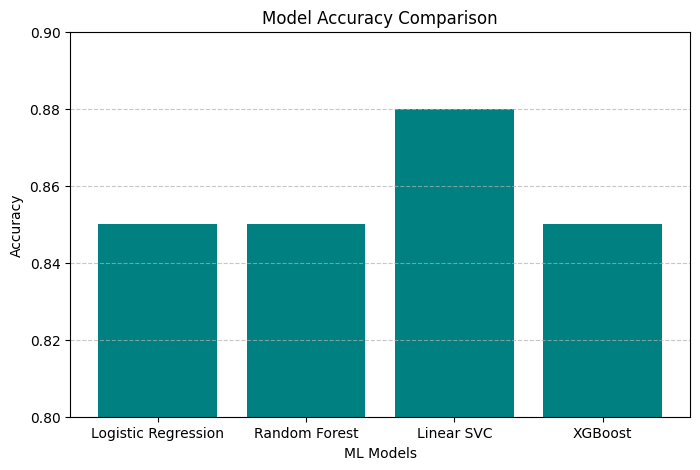

In [11]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'Linear SVC', 'XGBoost']
accuracies = [0.85, 0.85, 0.88, 0.85]  # Update if needed

plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color='teal')
plt.ylim(0.8, 0.9)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('ML Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


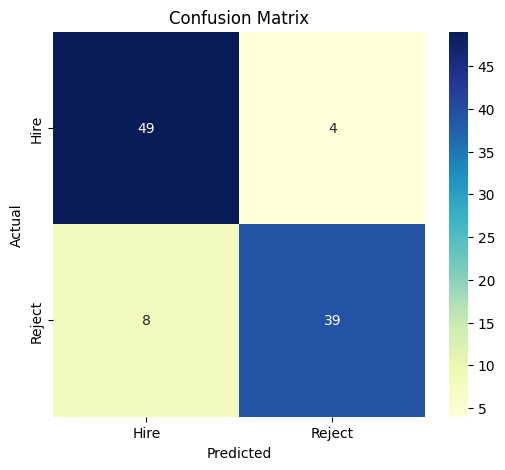

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Replace with your variables
cm = confusion_matrix(y_test, y_pred)
labels = ['Hire', 'Reject']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


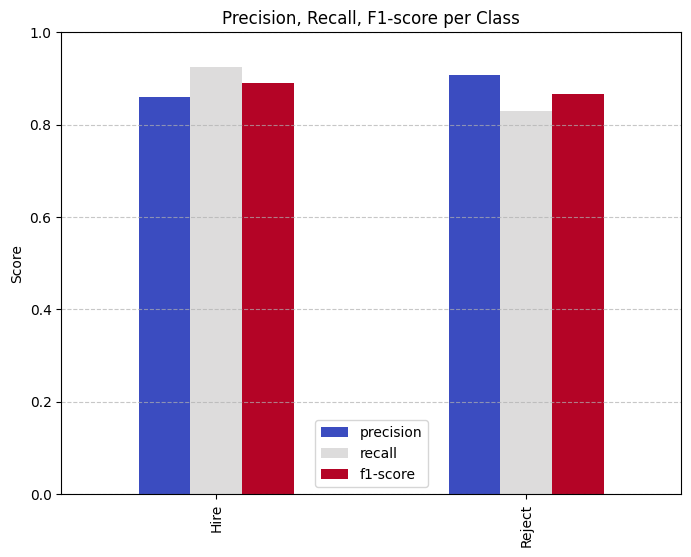

In [13]:
from sklearn.metrics import classification_report
import pandas as pd

# Get report as dictionary
report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report.iloc[:2, :3].plot(kind='bar', figsize=(8,6), colormap='coolwarm')
plt.title('Precision, Recall, F1-score per Class')
plt.ylabel('Score')
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/tmp/ipython-input-14-689012880.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


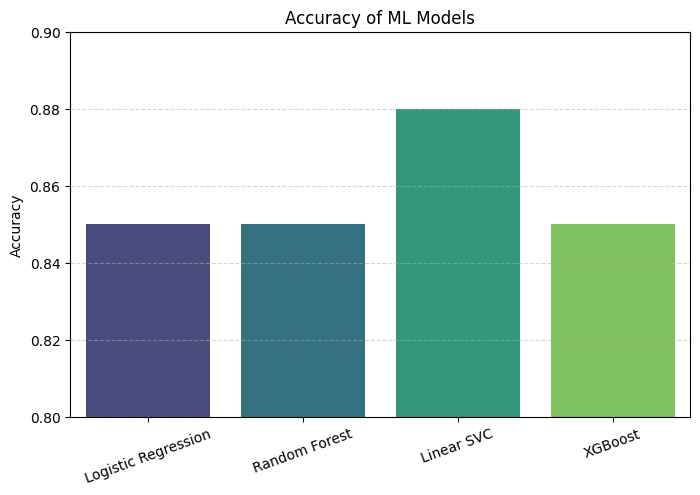

In [14]:
models = ['Logistic Regression', 'Random Forest', 'Linear SVC', 'XGBoost']
accuracies = [0.85, 0.85, 0.88, 0.85]  # Update if needed

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0.8, 0.9)
plt.ylabel("Accuracy")
plt.title("Accuracy of ML Models")
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


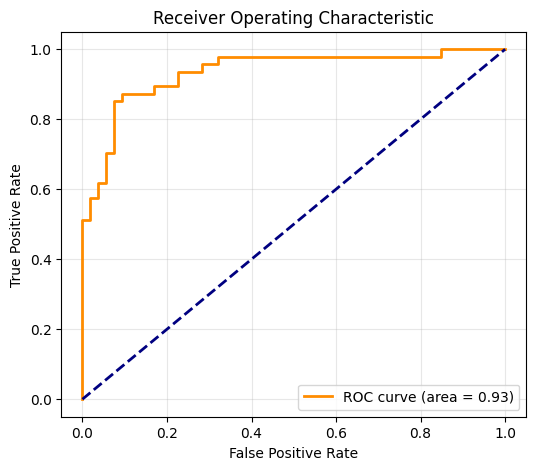

In [15]:
from sklearn.metrics import roc_curve, auc

# Convert y_test to 0/1 if needed and use a model that gives probability
y_prob = model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


<Figure size 800x500 with 0 Axes>

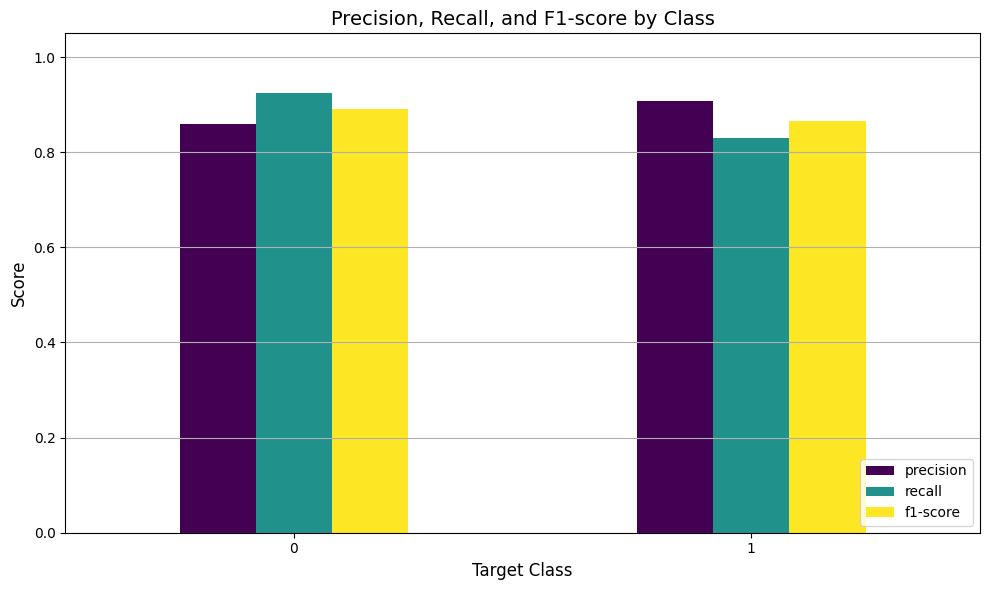

In [16]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Generate classification report as a dict
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame for plotting
report_df = pd.DataFrame(report).transpose()

# Drop support and accuracy rows (optional)
plot_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

# Plot barplot
plt.figure(figsize=(8, 5))
plot_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Precision, Recall, and F1-score by Class', fontsize=14)
plt.xlabel('Target Class', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Define pipeline
pipeline = Pipeline([
    ('clf', LinearSVC())
])

# Define parameter grid
param_grid = {
    'clf__C': np.linspace(0.1, 1.5, 10)
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid,
                                   n_iter=15, scoring='accuracy', cv=5,
                                   verbose=2, random_state=42, n_jobs=-1)

print(type(X_train), type(y_train))
print(X_train[:5])  # See a few values

# Fit the model
random_search.fit(X_train, y_train)

# Predict on test set
y_pred = random_search.predict(X_test)

# Results
print("Best Params:", random_search.best_params_)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

<class 'scipy.sparse._csr.csr_matrix'> <class 'numpy.ndarray'>
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 714 stored elements and shape (5, 2135)>
  Coords	Values
  (0, 941)	0.17681942731591074
  (0, 1922)	0.02946990455265179
  (0, 221)	0.17681942731591074
  (0, 2013)	0.14123891067553632
  (0, 759)	0.03276501912011133
  (0, 409)	0.11787961821060716
  (0, 1744)	0.05358935341964243
  (0, 457)	0.03487821787872626
  (0, 470)	0.03487821787872626
  (0, 1780)	0.03487821787872626
  (0, 676)	0.03487821787872626
  (0, 1642)	0.07608767208251978
  (0, 348)	0.07608767208251978
  (0, 1914)	0.07608767208251978
  (0, 1299)	0.07608767208251978
  (0, 1620)	0.07608767208251978
  (0, 1644)	0.07608767208251978
  (0, 548)	0.03516226735059373
  (0, 1585)	0.07032453470118746
  (0, 135)	0.07032453470118746
  (0, 1830)	0.11787961821060716
  (0, 2070)	0.07089816267527742
  (0, 1005)	0.03544908133763871
  (0, 643)	0.07496487325058405
  (0, 555)	0.07496487325058405
  :	:
  (4, 1920)	0.0805617816

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 10 is smaller than n_iter=15. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Params: {'clf__C': np.float64(0.25555555555555554)}

Accuracy: 0.83

Confusion Matrix:
 [[48  5]
 [12 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85        53
           1       0.88      0.74      0.80        47

    accuracy                           0.83       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.84      0.83      0.83       100



In [18]:
import joblib

# Save the best model
joblib.dump(random_search.best_estimator_, 'best_model.pkl')
print("Model saved as 'best_model.pkl'")


Model saved as 'best_model.pkl'


In [19]:
from google.colab import files
files.download('best_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [21]:
from google.colab import files
files.download('best_model.pkl')
files.download('vectorizer.pkl')  # if you're using a vectorizer


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import joblib

# Step 1: Load Data
data = pd.read_csv('conversational_interviews_clean_final.csv')  # Replace with your actual file

# Step 2: Prepare features and labels
X = data['interview_transcript']
y = data['hiring_decision']

# Step 3: Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Step 4: Train-test split (optional here, just for logic)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Step 5: Create a pipeline with vectorizer + model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('clf', LinearSVC(C=0.25, dual='auto'))
])

# Step 6: Fit the pipeline
pipeline.fit(X_train, y_train)

# Step 7: Save the whole pipeline
joblib.dump(pipeline, 'best_model.pkl')
print("🔥 Model and vectorizer saved as 'best_model.pkl'")



🔥 Model and vectorizer saved as 'best_model.pkl'


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib

# Load data
X = data['interview_transcript']
y = data['hiring_decision']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Create pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('clf', LinearSVC(C=0.25, dual='auto'))
])

# Fit
pipeline.fit(X_train, y_train)

# Save whole pipeline
joblib.dump(pipeline, 'final_model.pkl')
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']

In [24]:
from google.colab import files
files.download('final_model.pkl')
files.download('label_encoder.pkl')  # if you're using a vectorizer


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>